<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-in-DevTown/blob/main/DAY_45_Random_Forest_Regression_and_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Importing the Dataset

Link: https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

# Data Analysis

In [ ]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Assighning features & Target

In [ ]:
X = np.array(df.Temperature)
y = np.array(df.Revenue)

# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.5)

# Model selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=10,random_state=0)

# Training the Model

In [ ]:
regressor.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

<ipython-input-10-aa41665be4f5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

# Testing the Model

In [ ]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [ ]:
Target = pd.DataFrame({'Actual':y_test.reshape(-1),'Prediction':y_pred.reshape(-1)})

In [ ]:
Target.head()

,Actual,Prediction
0,627.650834,21.458968
1,782.012550,21.458968
2,656.636523,21.458968
3,379.318226,21.458968
4,550.701404,21.458968


Text(0, 0.5, 'Revenue')

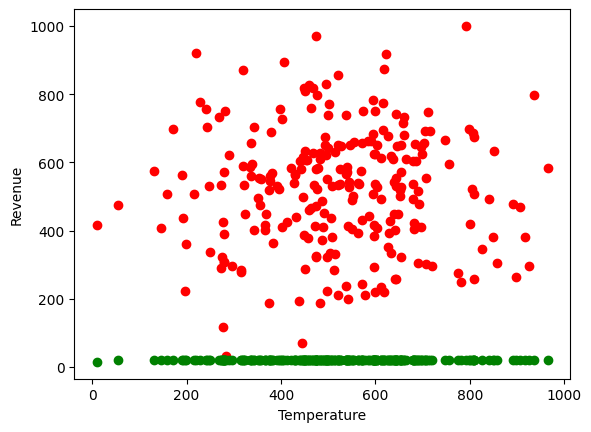

In [ ]:
#scatterplot
plt.scatter(X_test,y_test, color='red')
plt.scatter(X_test,y_pred, color='green')
plt.xlabel("Temperature")
plt.ylabel("Revenue")

<Axes: >

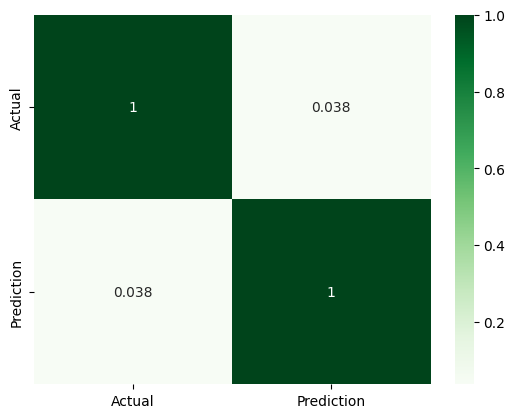

In [ ]:
#heatmap
sns.heatmap(Target.corr(), annot=True, cmap='Greens')

# Performance

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

-8.131307013483925

# Project - Random Forest Regressor
(Price Prediction of Used Cars)

Decision Tree - 45% -50%

RFR - 92% - 93%

Link: https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv

# Importing the Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Analysis

In [ ]:
df.shape

(301, 9)

In [ ]:
print("Fuel Type",df.Fuel_Type.unique())
print("Seller Type",df.Seller_Type.unique())
print("Transmission",df.Transmission.unique())
print("Owner Type",df.Owner.unique())

Fuel Type ['Petrol' 'Diesel' 'CNG']
Seller Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner Type [0 1 3]


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df['current_year'] = 2021

In [ ]:
df['no.of year'] = df['current_year'] - df['Year']

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no.of year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [ ]:
df.drop(['Car_Name','Year','current_year'],axis=1,inplace=True)

In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no.of year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no.of year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,8,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,10,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,7,0,1,0,1,0,0,1


In [ ]:
df.drop(['Fuel_Type_CNG', 'Seller_Type_Dealer', 'Transmission_Automatic'],axis=1, inplace=True)

In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no.of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [ ]:
df.shape

(301, 9)

In [ ]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no.of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no.of year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


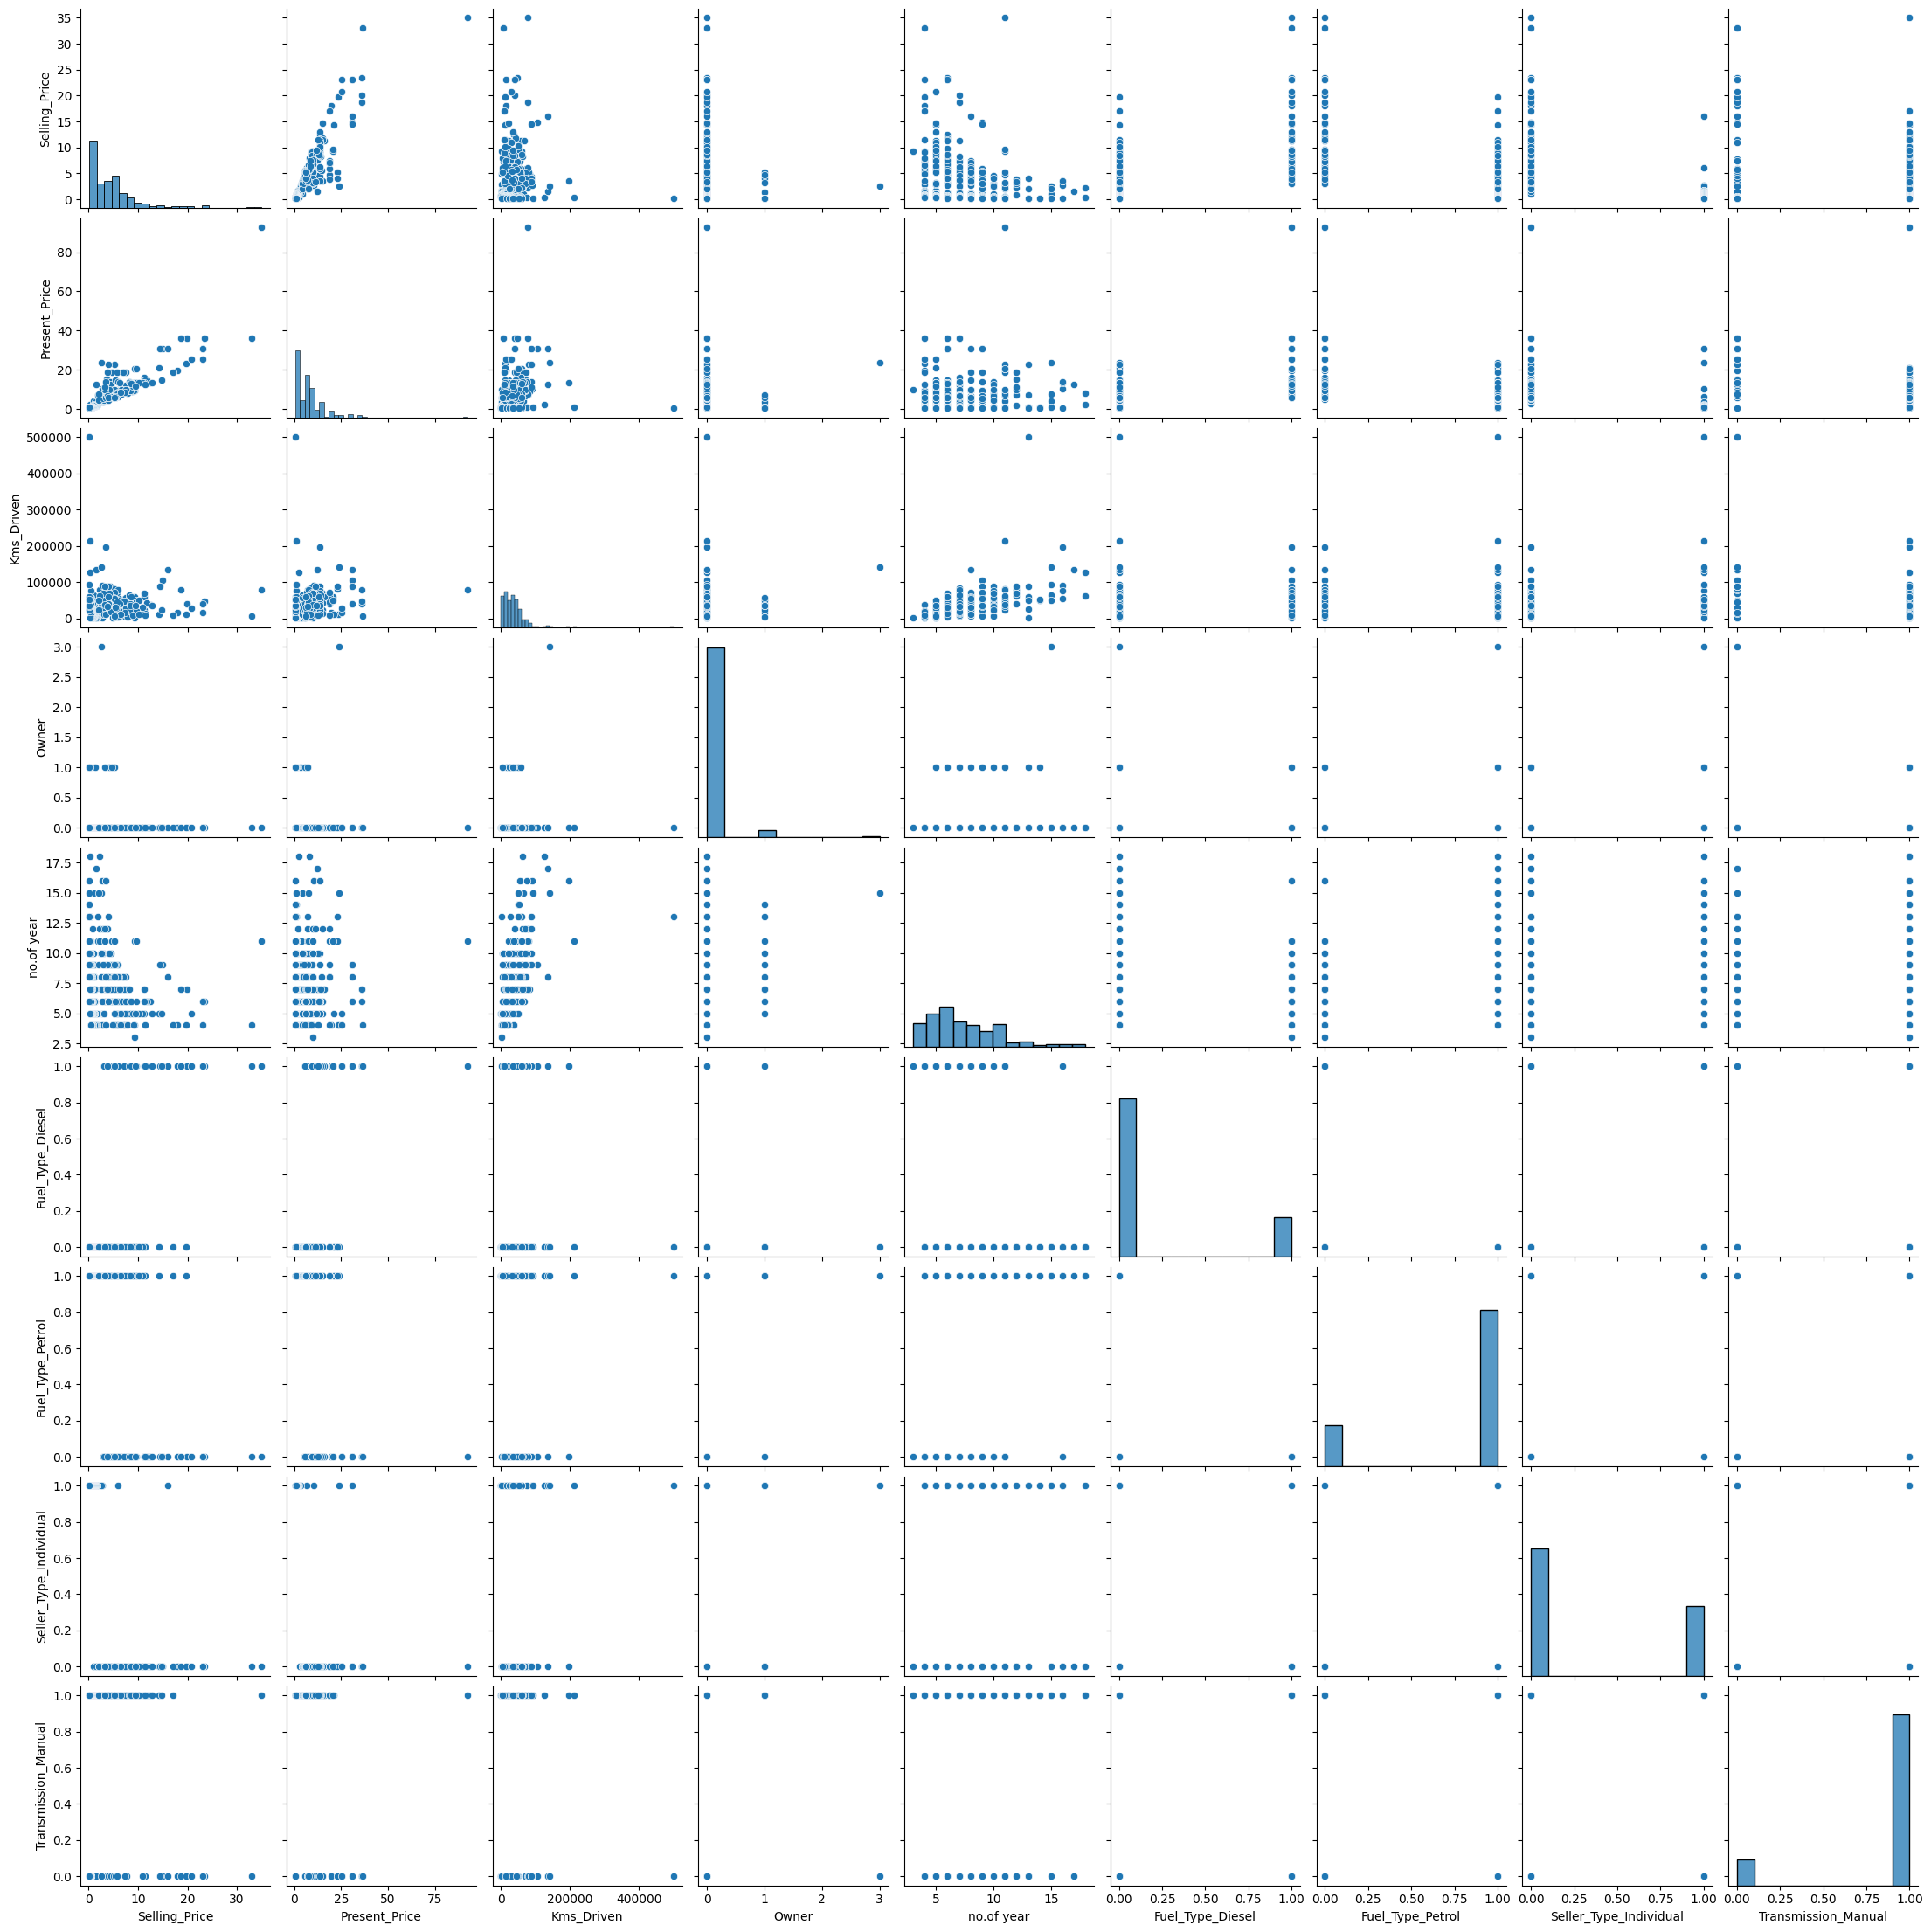

In [ ]:
#pairplot
sns.pairplot(df)

<Axes: >

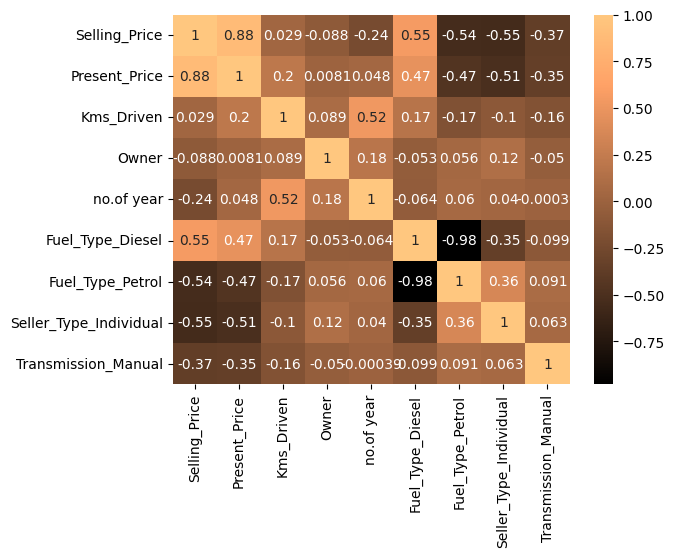

In [ ]:
#heatmap
sns.heatmap(df.corr(),annot=True,cmap="copper")

# Preprocessing

In [ ]:
# X = np.array(df.drop('Selling_Price'))
# X = np.array(df.iloc[:,1:])
# y = np.array(df.iloc[:,0])
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
X

,Present_Price,Kms_Driven,Owner,no.of year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,5,1,0,0,1
297,5.90,60000,0,6,0,1,0,1
298,11.00,87934,0,12,0,1,0,1
299,12.50,9000,0,4,1,0,0,1


In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Feature selection(Feature Impoetance)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model = ExtraTreesRegressor()

In [ ]:
feat_imp = model.fit(X,y)

In [ ]:
feat_imp.feature_importances_

array([0.339712  , 0.04229237, 0.00087439, 0.07305074, 0.25082883,
       0.00883205, 0.13309468, 0.15131494])

<Axes: >

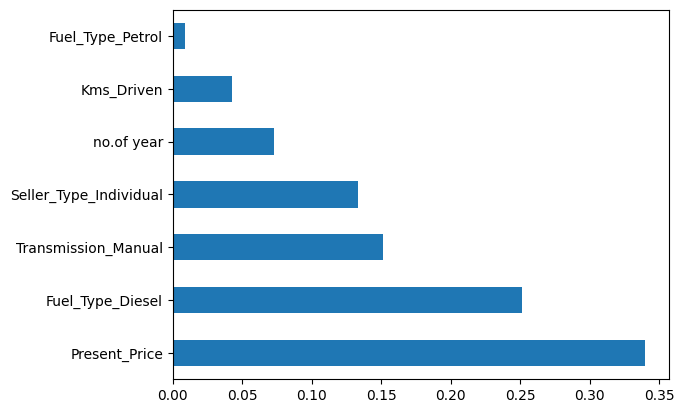

In [ ]:
#For 1D data we use Series
imp = pd.Series(feat_imp.feature_importances_, index=X.columns)

imp.nlargest(7).plot(kind='barh')

# Splitting the Data

In [ ]:
X_train,y_train,X_test,y_teat = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_test

74      4.90
239     2.00
64     33.00
294     3.75
286     5.65
       ...  
251     5.00
192     0.20
117     1.10
47      1.05
172     0.40
Name: Selling_Price, Length: 240, dtype: float64

# Model selection

In [ ]:
regressor = RandomForestRegressor()

# Hyper Parameter Tuning

In [ ]:
n_estimators = [int(i) for i in np.linspace(start=100, stop=1200, num=12)]

max_features = ['auto','sqrt']

max_depth = [int(i) for i in np.linspace(start=5, stop=30, num=6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5,10]

In [ ]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_regressor = RandomizedSearchCV(estimator=regressor,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  cv=5,
                                  verbose = 2,
                                  random_state=42,
                                  n_jobs=1)

# Training the Model

In [ ]:
rf_regressor.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [240, 61]

In [ ]:
rf_regressor.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

# Testing the model

In [ ]:
y_pred = rf_regressor.predict(X_test)

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

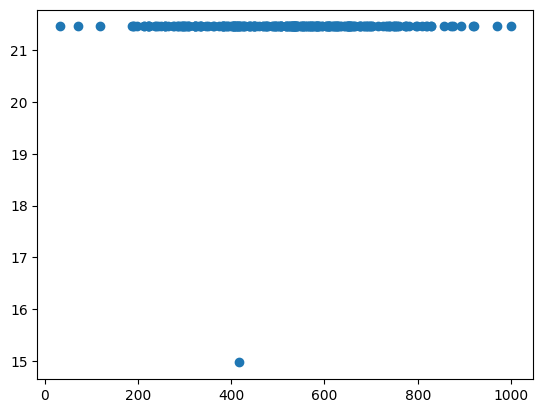

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
finaldf = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

In [ ]:
finaldf

,Actual,Predicted
0,627.650834,21.458968
1,782.012550,21.458968
2,656.636523,21.458968
3,379.318226,21.458968
4,550.701404,21.458968
...,...,...
245,526.547065,21.458968
246,751.054570,21.458968
247,384.699415,21.458968
248,221.400252,21.458968


<Axes: >

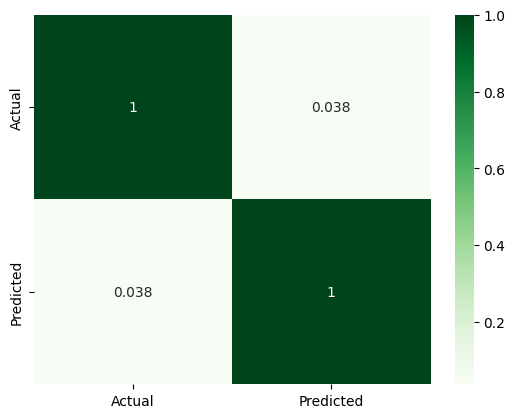

In [ ]:
sns.heatmap(finaldf.corr(), annot=True, cmap='Greens')

# Performance/Accuracy

In [ ]:
r2_score(y_test, y_pred)

-8.131307013483925